In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
import seaborn as sns

In [169]:
filename = 'NBAShot Locations1997-2020.csv'
df = pd.read_csv(filename)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729512 entries, 0 to 4729511
Data columns (total 22 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Game ID            int64 
 1   Game Event ID      int64 
 2   Player ID          int64 
 3   Player Name        object
 4   Team ID            int64 
 5   Team Name          object
 6   Period             int64 
 7   Minutes Remaining  int64 
 8   Seconds Remaining  int64 
 9   Action Type        object
 10  Shot Type          object
 11  Shot Zone Basic    object
 12  Shot Zone Area     object
 13  Shot Zone Range    object
 14  Shot Distance      int64 
 15  X Location         int64 
 16  Y Location         int64 
 17  Shot Made Flag     int64 
 18  Game Date          int64 
 19  Home Team          object
 20  Away Team          object
 21  Season Type        object
dtypes: int64(12), object(10)
memory usage: 793.8+ MB


In [171]:
df.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
0,29700427,389,100,Tim Legler,1610612764,Washington Wizards,4,11,22,Jump Shot,...,Right Side(R),8-16 ft.,15,117,109,1,19980102,WAS,IND,Regular Season
1,29700427,406,100,Tim Legler,1610612764,Washington Wizards,4,9,36,Jump Shot,...,Right Side(R),8-16 ft.,14,143,25,0,19980102,WAS,IND,Regular Season
2,29700427,475,100,Tim Legler,1610612764,Washington Wizards,4,3,7,Jump Shot,...,Left Side(L),8-16 ft.,10,-87,55,0,19980102,WAS,IND,Regular Season
3,29700427,487,100,Tim Legler,1610612764,Washington Wizards,4,1,45,Jump Shot,...,Center(C),Less Than 8 ft.,5,-1,53,0,19980102,WAS,IND,Regular Season
4,29700427,497,100,Tim Legler,1610612764,Washington Wizards,4,0,45,Jump Shot,...,Right Side(R),8-16 ft.,14,89,113,0,19980102,WAS,IND,Regular Season


In [172]:
df = df.dropna()

In [174]:
team_mappings = {
    "Atlanta Hawks": "ATL",
    "Boston Celtics": "BOS",
    "Brooklyn Nets": "BKN",
    "Charlotte Hornets": "CHH",
    "Chicago Bulls": "CHI",
    "Cleveland Cavaliers": "CLE",
    "Dallas Mavericks": "DAL",
    "Denver Nuggets": "DEN",
    "Detroit Pistons": "DET",
    "Golden State Warriors": "GSW",
    "Houston Rockets": "HOU",
    "Indiana Pacers": "IND",
    "Los Angeles Clippers": "LAC",
    "LA Clippers": "LAC",
    "Los Angeles Lakers": "LAL",
    "Memphis Grizzlies": "MEM",
    "Miami Heat": "MIA",
    "Milwaukee Bucks": "MIL",
    "Minnesota Timberwolves": "MIN",
    "New Orleans Pelicans": "NOP",
    "New York Knicks": "NYK",
    "Oklahoma City Thunder": "OKC",
    "Orlando Magic": "ORL",
    "Philadelphia 76ers": "PHI",
    "Phoenix Suns": "PHX",
    "Portland Trail Blazers": "POR",
    "Sacramento Kings": "SAC",
    "San Antonio Spurs": "SAS",
    "Seattle SuperSonics": "SEA",
    "Toronto Raptors": "TOR",
    "Utah Jazz": "UTA",
    "Washington Wizards": "WAS",
    "Vancouver Grizzlies": "VAN",
    "New Jersey Nets": "NJN",
    "New Orleans Hornets": "NOH",
    "Charlotte Bobcats": "CHA",
    "New Orleans/Oklahoma City Hornets": "NOK"
}

df['Team Name'] = df['Team Name'].replace(team_mappings)
df['Shot Made'] = df['Shot Made Flag'].astype(bool)
df['Shot Location'] = df.apply(lambda row: 'Home' if row['Home Team'] == row['Team Name'] else 'Away', axis=1)

In [176]:
df.head()

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type,Shot Made,Shot Location
0,29700427,389,100,Tim Legler,1610612764,WAS,4,11,22,Jump Shot,...,15,117,109,1,19980102,WAS,IND,Regular Season,True,Home
1,29700427,406,100,Tim Legler,1610612764,WAS,4,9,36,Jump Shot,...,14,143,25,0,19980102,WAS,IND,Regular Season,False,Home
2,29700427,475,100,Tim Legler,1610612764,WAS,4,3,7,Jump Shot,...,10,-87,55,0,19980102,WAS,IND,Regular Season,False,Home
3,29700427,487,100,Tim Legler,1610612764,WAS,4,1,45,Jump Shot,...,5,-1,53,0,19980102,WAS,IND,Regular Season,False,Home
4,29700427,497,100,Tim Legler,1610612764,WAS,4,0,45,Jump Shot,...,14,89,113,0,19980102,WAS,IND,Regular Season,False,Home


## Home vs Away

Plot showing the shooting percentage of all teams when playing as the Home Team vs Away Team

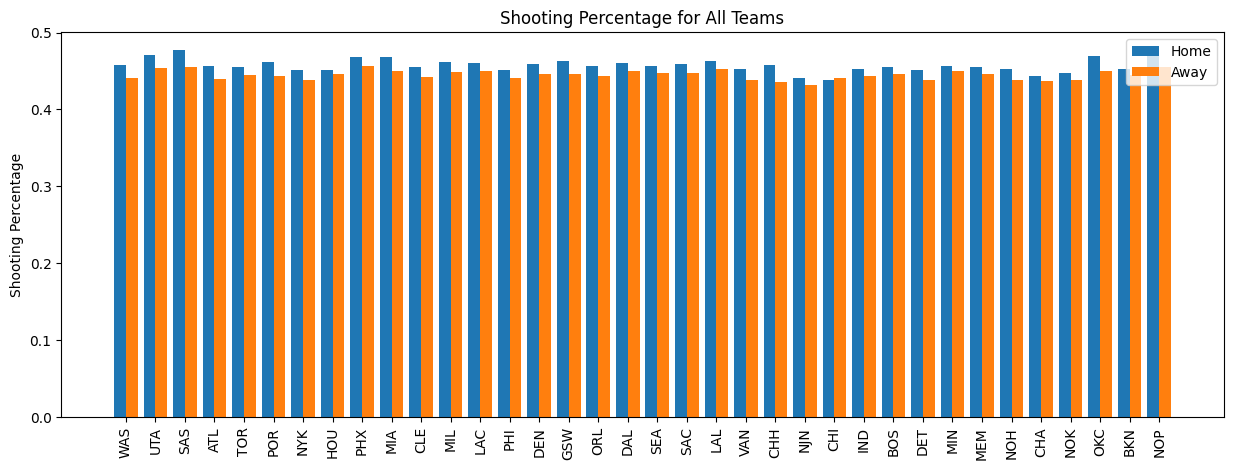

In [42]:
def plot_shooting_percentage_all_teams(data):
    # Create an empty dictionary to store the shooting percentages for each team
    shooting_pct_dict = {}

    # Loop over all the teams in the dataset
    for team_name in data['Team Name'].unique():
        # Subset the data to include only the rows for the current team
        team_data = data[data['Team Name'] == team_name]

        # Compute the shooting percentage for home games
        home_shots = team_data[team_data['Home Team'] == team_name]
        home_made = home_shots['Shot Made Flag'].sum()
        home_total = len(home_shots)
        home_pct = home_made / home_total

        # Compute the shooting percentage for away games
        away_shots = team_data[team_data['Away Team'] == team_name]
        away_made = away_shots['Shot Made Flag'].sum()
        away_total = len(away_shots)
        away_pct = away_made / away_total

        # Store the shooting percentages for the current team in the dictionary
        shooting_pct_dict[team_name] = (home_pct, away_pct)

    # Create a bar chart of the shooting percentages for all teams
    fig, ax = plt.subplots(figsize=(15, 5))
    x = range(len(shooting_pct_dict))
    ax.bar(x, [pct[0] for pct in shooting_pct_dict.values()], width=0.4, label='Home')
    ax.bar([i + 0.4 for i in x], [pct[1] for pct in shooting_pct_dict.values()], width=0.4, label='Away')
    ax.set_title('Shooting Percentage for All Teams')
    ax.set_ylabel('Shooting Percentage')
    ax.set_xticks([i + 0.2 for i in x])
    ax.set_xticklabels(shooting_pct_dict.keys())
    ax.legend()
    plt.xticks(rotation=90)
    plt.show()
    
plot_shooting_percentage_all_teams(df)

Get the shot percentage for any required team played at Home vs Away

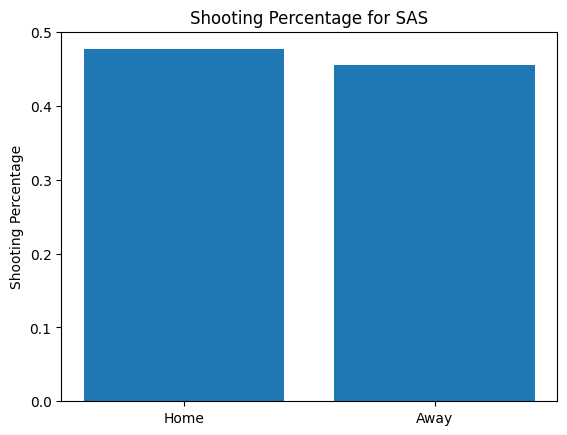

In [43]:
def plot_shooting_percentage(team_name, data):
    # Subset the data to include only the rows for the specified team
    team_data = data[(data['Team Name'] == team_name)]
    
    # Compute the shooting percentage for home games
    home_shots = team_data[team_data['Shot Location'] == 'Home']
    home_made = home_shots['Shot Made'].sum()
    home_total = len(home_shots)
    home_pct = home_made / home_total

    # Compute the shooting percentage for away games
    away_shots = team_data[team_data['Shot Location'] == 'Away']
    away_made = away_shots['Shot Made'].sum()
    away_total = len(away_shots)
    away_pct = away_made / away_total

    # Create a bar chart of the shooting percentages
    fig, ax = plt.subplots()
    ax.bar(['Home', 'Away'], [home_pct, away_pct])
    ax.set_title(f'Shooting Percentage for {team_name}')
    ax.set_ylabel('Shooting Percentage')
    plt.show()

plot_shooting_percentage('SAS', df)

Get the top 5 shooters in any team when played at Home vs Away

In [44]:
def get_top_shooters(team_name, data):
    team_data = data[data['Team Name'] == team_name]
    # Subset the data to include only the rows for the current team
    team_data = data[data['Team Name'] == team_name]

    # Subset the data to include only successful shots
    successful_shots = team_data[team_data['Shot Made Flag'] == 1]

    # Compute the shooting percentage for home games
    home_shots = successful_shots[successful_shots['Home Team'] == team_name]
    home_pct = len(home_shots) / len(successful_shots)

    # Compute the shooting percentage for away games
    away_shots = successful_shots[successful_shots['Away Team'] == team_name]
    away_pct = len(away_shots) / len(successful_shots)

    # Get the top 5 shooters in home games
    top_home_shooters = home_shots.groupby('Player Name')['Shot Made Flag'].count().sort_values(ascending=False).head(5)

    # Get the top 5 shooters in away games
    top_away_shooters = away_shots.groupby('Player Name')['Shot Made Flag'].count().sort_values(ascending=False).head(5)
    
    return top_home_shooters, top_away_shooters

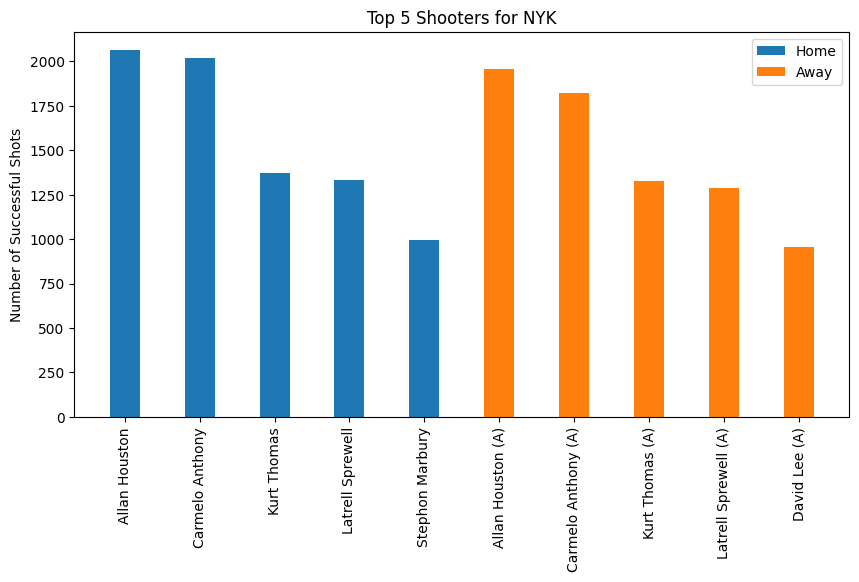

In [45]:
def plot_top_shooters(team_name, data):
    
    top_home_shooters, top_away_shooters = get_top_shooters(team_name, data)
    
    # Create a bar chart of the top shooters
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(top_home_shooters.index, top_home_shooters, width=0.4, label='Home')
    ax.bar([name + ' (A)' for name in top_away_shooters.index], top_away_shooters, width=0.4, label='Away')
    ax.set_title(f'Top 5 Shooters for {team_name}')
    ax.set_ylabel('Number of Successful Shots')
    ax.legend()
    plt.xticks(rotation=90)
    plt.show()
    
plot_top_shooters('NYK', df)

In [46]:
def top_5_good_and_role_players(team_name, data):
    top_home, top_away = get_top_shooters(team_name, data)
    
    top_home_names = set(top_home.index)
    top_away_names = set(top_away.index)
    
    good_players = top_home_names.intersection(top_away_names)
    role_home_players = top_home_names.difference(top_away_names)
    role_away_players = top_away_names.difference(top_home_names)
    
    print("\033[1mTeam Name: \033[0m", team_name)
    print("\033[1mGood Shooters (Top shooters at both home and away locations):\033[0m", good_players)
    print("\033[1mHome Role Shooters (Top shooters at only the home locations):\033[0m", role_home_players)
    print("\033[1mAway Role Shooters (Top shooters at only the away locations):\033[0m", role_away_players)
    
top_5_good_and_role_players('NYK', df)
            
        

Team Name:  NYK
Good Shooters (Top shooters at both home and away locations): {'Allan Houston', 'Latrell Sprewell', 'Carmelo Anthony', 'Kurt Thomas'}
Home Role Shooters (Top shooters at only the home locations): {'Stephon Marbury'}
Away Role Shooters (Top shooters at only the away locations): {'David Lee'}


## Coach analysis

In [177]:
fn = 'NBA_head_coaches.csv'
coachdata = pd.read_csv(fn)

In [209]:
coachdata.head()

,Name,Teams,Start season,End season,Years in rule,Birth Date,Nationality,Start season short,End season short,Num of teams
0,Rick Adelman,"POR, GOS, SAC, HOU, MIN",1988-1989,2013-2014,23,"Jun 16, 1946",United States,1988,2013,5
1,Richie Adubato,"DET, DAL, ORL",1979-1980,1996-1997,6,-,United States,1979,1996,3
2,Danny Ainge,PHX,1996-1997,1999-2000,4,"Mar 17, 1959",United States,1996,1999,1
3,Stan Albeck,"DEN, CLE, SAN, BRK, CHI",1970-1971,1985-1986,8,-,-,1970,1985,5
4,Kenny Atkinson,BRK,2016-2017,2019-2020,4,"Jun 2, 1967",United States,2016,2019,1


In [179]:
coachdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                280 non-null    object
 1   Teams               280 non-null    object
 2   Start season        280 non-null    object
 3   End season          280 non-null    object
 4   Years in rule       280 non-null    int64 
 5   Birth Date          280 non-null    object
 6   Nationality         280 non-null    object
 7   Start season short  280 non-null    int64 
 8   End season short    280 non-null    object
 9   Num of teams        280 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 22.0+ KB


In [180]:
df['Game Date'] = pd.to_datetime(df['Game Date'].astype(str), format='%Y%m%d')
df['Game Date'] = df['Game Date'].apply(lambda x: x.replace(year=1) if x.year == 1 else x)

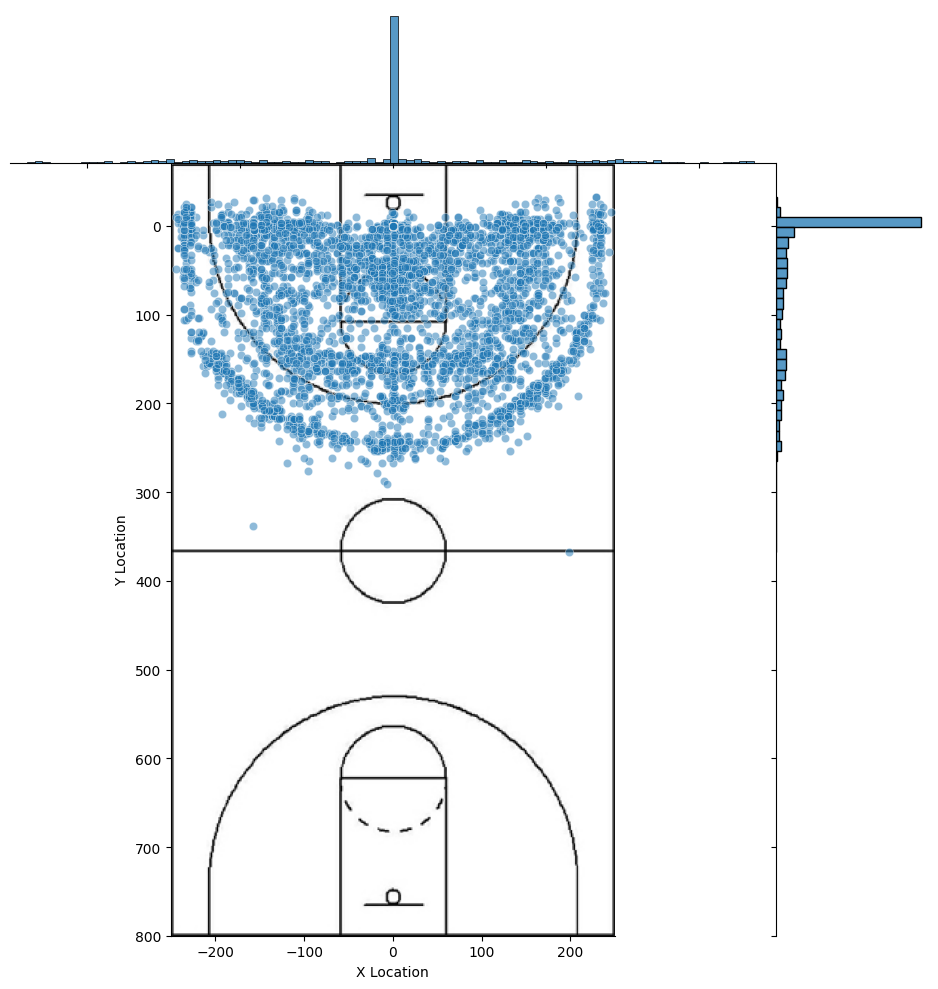

In [211]:
def get_coach_effect(coach_name, coach_df, shots_df):
    start_year = str(coach_df.loc[coach_df['Name'] == coach_name, 'Start season short'].iloc[0])
    end_year = coach_df.loc[coach_df['Name'] == coach_name, 'End season short'].iloc[0]
    start_date = pd.to_datetime(start_year + '0101', format='%Y%m%d')
    end_date = pd.to_datetime(end_year + '1231', format='%Y%m%d')
    coach_shots_df = shots_df[(shots_df['Game Date'] >= start_date) & (shots_df['Game Date'] <= end_date)]
    coach_teams = coach_df.loc[coach_df['Name'] == coach_name, 'Teams'].iloc[0].split(', ')
    coach_shots_df = coach_shots_df[coach_shots_df['Team Name'].isin(coach_teams)]
    
    for team in coach_teams:
        team_shots_df = coach_shots_df.loc[coach_shots_df['Team Name'] == team]
        team_shots_df = team_shots_df[team_shots_df['Shot Made'] == True]
        sns.jointplot(data=team_shots_df, x='X Location', y='Y Location', kind='scatter', space=0, alpha=0.5, height=10)
        
        img = plt.imread('full-court.jpeg')
        plt.imshow(img, extent=[-250, 250, -70.5, 800])
        plt.xlim(-250, 250)
        plt.ylim(800, -70.5)
        plt.title(f'{team} Shot Chart')
        plt.show()
    
get_coach_effect("Danny Ainge", coachdata, df)

## Defending Shots Based on Shot Type

In [100]:
defense_df = df.groupby(['Team Name', 'Shot Zone Area', 'Shot Type'])['Shot Made Flag'].mean().reset_index()

In [101]:
# Pivot the table to make the Shot type as the columns and teams as the rows
pivot_table = pd.pivot_table(data=defense_df, index='Team Name', columns='Shot Type', values='Shot Made Flag')

Heat Map to represent the defense from the teams against the shot types

<Axes: xlabel='Shot Type', ylabel='Team Name'>

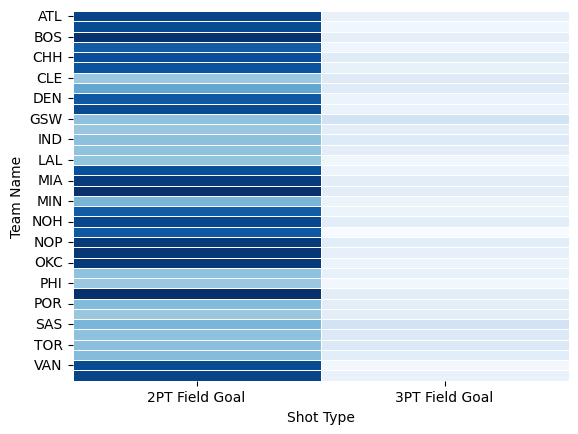

In [102]:
sns.heatmap(data=pivot_table, cmap='Blues',  fmt='.0f', linewidths=0.5, cbar=False)

Bar chart for visualizing the same data

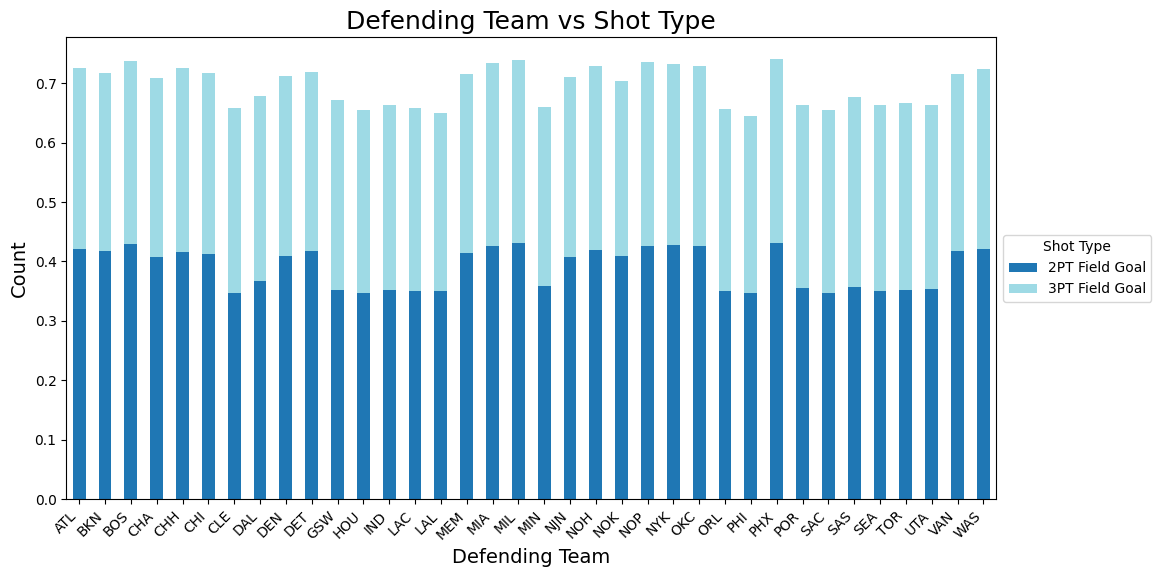

In [103]:
pivot_table.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Defending Team vs Shot Type', fontsize=18)
plt.xlabel('Defending Team', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Shot Type')
plt.show()

Heat Map to show all shot types at every shot zone for all defending teams

In [104]:
# Pivot the table to make the Shot type as the columns and teams as the rows
pivot_table_all = pd.pivot_table(data=defense_df, index='Team Name', columns=['Shot Zone Area', 'Shot Type'], values='Shot Made Flag')

<Axes: xlabel='Shot Zone Area-Shot Type', ylabel='Team Name'>

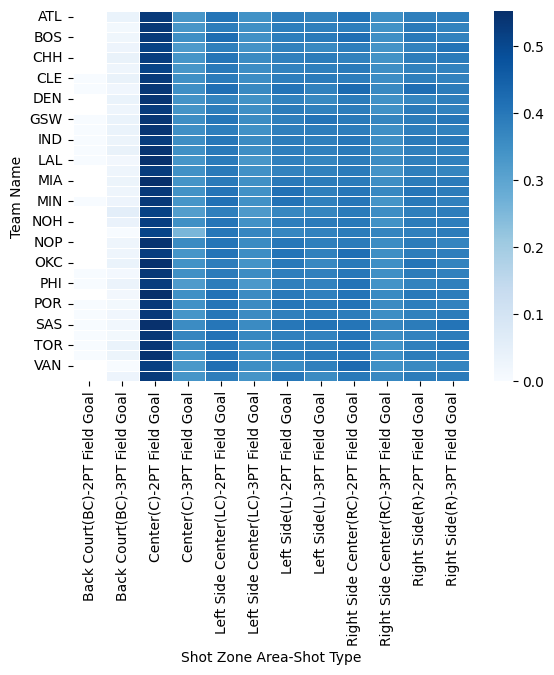

In [105]:
# create a heatmap
sns.heatmap(data=pivot_table_all, cmap='Blues',  fmt='.0f', linewidths=.5, cbar=True)

Bar chart for visualizing the same data

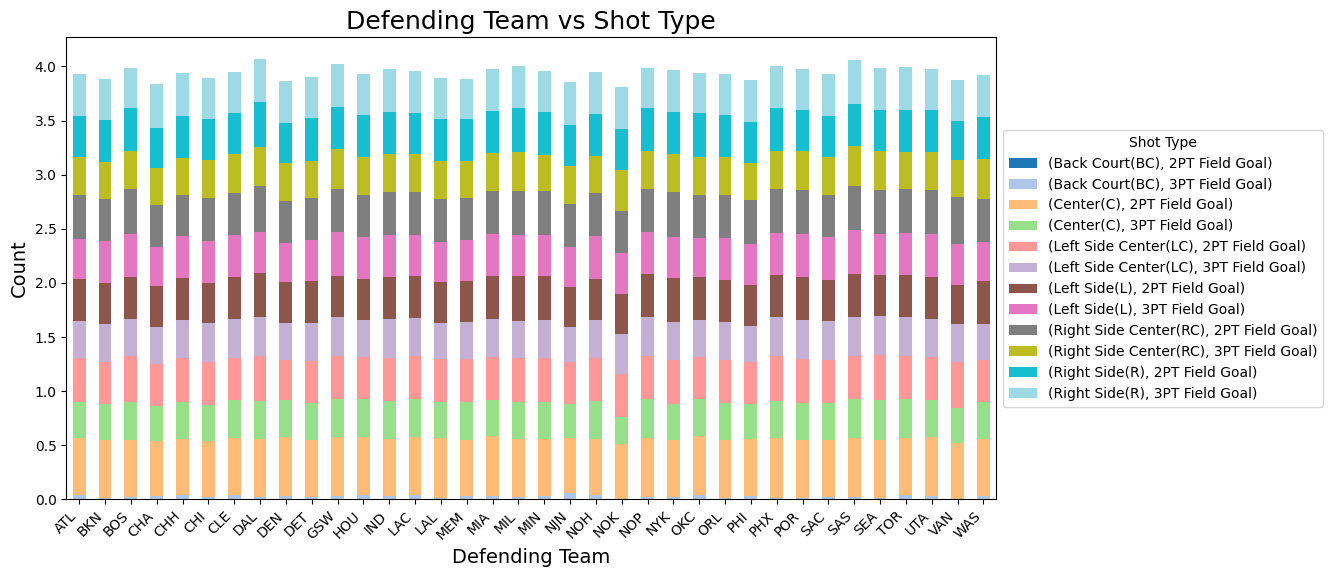

In [106]:
pivot_table_all.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Defending Team vs Shot Type', fontsize=18)
plt.xlabel('Defending Team', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Shot Type')
plt.show()